In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [27]:
df1 = pd.read_csv('finaleSanté.csv')
#df1=df.set_index('Annee')

In [109]:
df1

,Annee,Taux de prevalence contraceptive,Actes Postnatal,Actes Prénatal,Actes Santé de la Reproduction,Condom,Cycle Pilule,D I U,Implant,Injectable,...,Hôpitaux généraux,Hôpitaux régionaux,"Instituts, centres et Hôpitaux spécialisés",Cabinets Dentaires,Cabinets de libre pratique,Cliniques,Grossistes répartiteurs,Officine Catégorie B de nuit,Officines,Officines Catégorie A de jour )
0,2006,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,104364.0,606186.0,772120.0,59951.0,252052.0,47471.0,3367.0,36896.0,...,12.0,34.0,21.0,NaN,NaN,NaN,75.0,291.0,1972.0,1681.0
3,2014,NaN,105905.0,587735.0,770159.0,58977.0,240305.0,47050.0,3255.0,40570.0,...,23.0,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,NaN,99281.0,588275.0,821454.0,67014.0,232432.0,45914.0,3331.0,40987.0,...,23.0,32.0,11.0,2800.0,7675.0,91.0,83.0,296.0,2006.0,1710.0
5,2016,NaN,103221.0,563242.0,866118.0,71638.0,224305.0,49110.0,3616.0,42790.0,...,23.0,32.0,11.0,2802.0,7727.0,93.0,NaN,NaN,NaN,NaN
6,2017,NaN,95528.0,526963.0,837764.0,61533.0,215414.0,33095.0,4009.0,43223.0,...,23.0,35.0,11.0,NaN,NaN,NaN,93.0,305.0,2050.0,1745.0
7,2018,51.0,91437.0,509572.0,832639.0,52714.0,256892.0,32306.0,3233.0,46762.0,...,23.0,35.0,11.0,4508.0,8353.0,102.0,96.0,348.0,2127.0,1779.0
8,2019,NaN,82458.0,470378.0,852971.0,65250.0,199034.0,39940.0,3588.0,44413.0,...,23.0,35.0,11.0,4801.0,8583.0,106.0,100.0,369.0,2172.0,1803.0
9,2020,NaN,58609.0,359192.0,573573.0,52526.0,149837.0,27317.0,2791.0,36977.0,...,23.0,35.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
annee=df1['Annee']
ser=pd.Series(data=annee,index=[2006,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
ser

2006   NaN
2012   NaN
2013   NaN
2014   NaN
2015   NaN
2016   NaN
2017   NaN
2018   NaN
2019   NaN
2020   NaN
2021   NaN
Name: Annee, dtype: float64

In [120]:

df1.dtypes



Annee                                           int64
Taux de prevalence contraceptive              float64
Actes Postnatal                               float64
Actes Prénatal                                float64
Actes Santé de la Reproduction                float64
Condom                                        float64
Cycle Pilule                                  float64
D I U                                         float64
Implant                                       float64
Injectable                                    float64
Ligature des Trompes                          float64
Spermicide                                    float64
Total des bénéficiaires                       float64
Bénéficiaires par sexe                        float64
Femmes                                        float64
Femmes en âge de reproduction                 float64
Hommes                                        float64
Jeunes                                        float64
Infermiers                  

In [121]:
df2=df1.astype(int)
df2

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [65]:
df1.isnull().sum()

Taux de prevalence contraceptive              8
Actes Postnatal                               2
Actes Prénatal                                2
Actes Santé de la Reproduction                2
Condom                                        2
Cycle Pilule                                  2
D I U                                         2
Implant                                       2
Injectable                                    2
Ligature des Trompes                          2
Spermicide                                    2
Total des bénéficiaires                       2
Bénéficiaires par sexe                        2
Femmes                                        2
Femmes en âge de reproduction                 2
Hommes                                        2
Jeunes                                        2
Infermiers                                    3
Medecins                                      3
Médecins de Libres pratiques                  3
Médecins de la Santé publique           

In [66]:
df3=df.dropna()
df3





,Annee,Taux de prevalence contraceptive,Actes Postnatal,Actes Prénatal,Actes Santé de la Reproduction,Condom,Cycle Pilule,D I U,Implant,Injectable,...,Hôpitaux généraux,Hôpitaux régionaux,"Instituts, centres et Hôpitaux spécialisés",Cabinets Dentaires,Cabinets de libre pratique,Cliniques,Grossistes répartiteurs,Officine Catégorie B de nuit,Officines,Officines Catégorie A de jour )
7,2018,51.0,91437.0,509572.0,832639.0,52714.0,256892.0,32306.0,3233.0,46762.0,...,23.0,35.0,11.0,4508.0,8353.0,102.0,96.0,348.0,2127.0,1779.0


In [67]:
df2.isnull().sum()

Annee                                         0
Taux de prevalence contraceptive              0
Actes Postnatal                               0
Actes Prénatal                                0
Actes Santé de la Reproduction                0
Condom                                        0
Cycle Pilule                                  0
D I U                                         0
Implant                                       0
Injectable                                    0
Ligature des Trompes                          0
Spermicide                                    0
Total des bénéficiaires                       0
Bénéficiaires par sexe                        0
Femmes                                        0
Femmes en âge de reproduction                 0
Hommes                                        0
Jeunes                                        0
Infermiers                                    0
Medecins                                      0
Médecins de Libres pratiques            

In [6]:
df1

,Annee,Taux de prevalence contraceptive,Actes Postnatal,Actes Prénatal,Actes Santé de la Reproduction,Condom,Cycle Pilule,D I U,Implant,Injectable,...,Hôpitaux généraux,Hôpitaux régionaux,"Instituts, centres et Hôpitaux spécialisés",Cabinets Dentaires,Cabinets de libre pratique,Cliniques,Grossistes répartiteurs,Officine Catégorie B de nuit,Officines,Officines Catégorie A de jour )
0,2006,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013,NaN,104364.0,606186.0,772120.0,59951.0,252052.0,47471.0,3367.0,36896.0,...,12.0,34.0,21.0,NaN,NaN,NaN,75.0,291.0,1972.0,1681.0
3,2014,NaN,105905.0,587735.0,770159.0,58977.0,240305.0,47050.0,3255.0,40570.0,...,23.0,32.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,NaN,99281.0,588275.0,821454.0,67014.0,232432.0,45914.0,3331.0,40987.0,...,23.0,32.0,11.0,2800.0,7675.0,91.0,83.0,296.0,2006.0,1710.0
5,2016,NaN,103221.0,563242.0,866118.0,71638.0,224305.0,49110.0,3616.0,42790.0,...,23.0,32.0,11.0,2802.0,7727.0,93.0,NaN,NaN,NaN,NaN
6,2017,NaN,95528.0,526963.0,837764.0,61533.0,215414.0,33095.0,4009.0,43223.0,...,23.0,35.0,11.0,NaN,NaN,NaN,93.0,305.0,2050.0,1745.0
7,2018,51.0,91437.0,509572.0,832639.0,52714.0,256892.0,32306.0,3233.0,46762.0,...,23.0,35.0,11.0,4508.0,8353.0,102.0,96.0,348.0,2127.0,1779.0
8,2019,NaN,82458.0,470378.0,852971.0,65250.0,199034.0,39940.0,3588.0,44413.0,...,23.0,35.0,11.0,4801.0,8583.0,106.0,100.0,369.0,2172.0,1803.0
9,2020,NaN,58609.0,359192.0,573573.0,52526.0,149837.0,27317.0,2791.0,36977.0,...,23.0,35.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


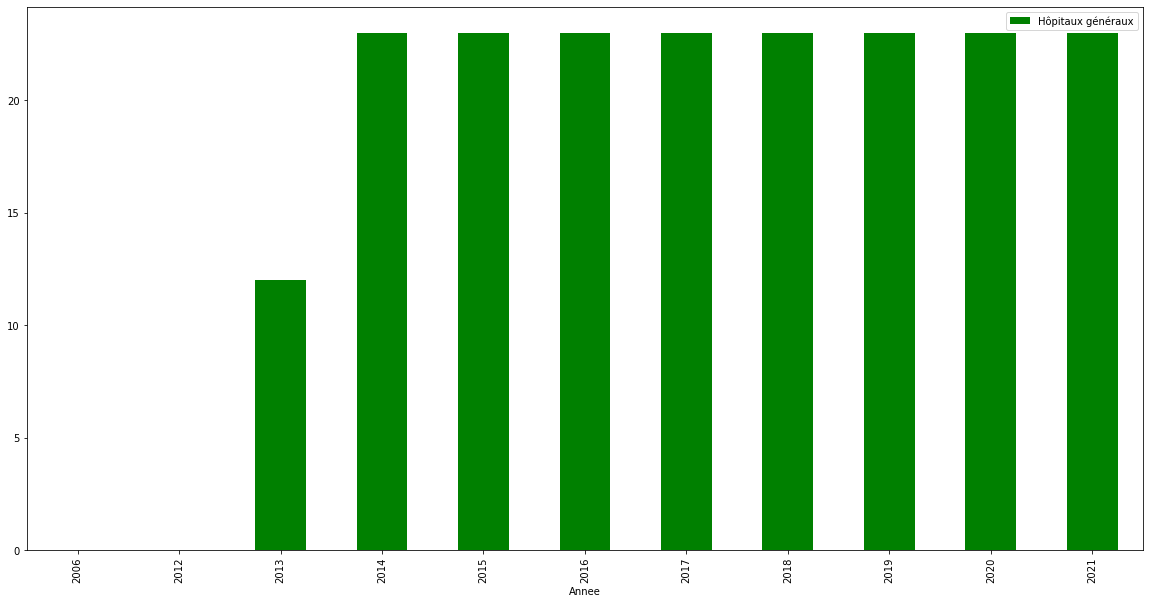

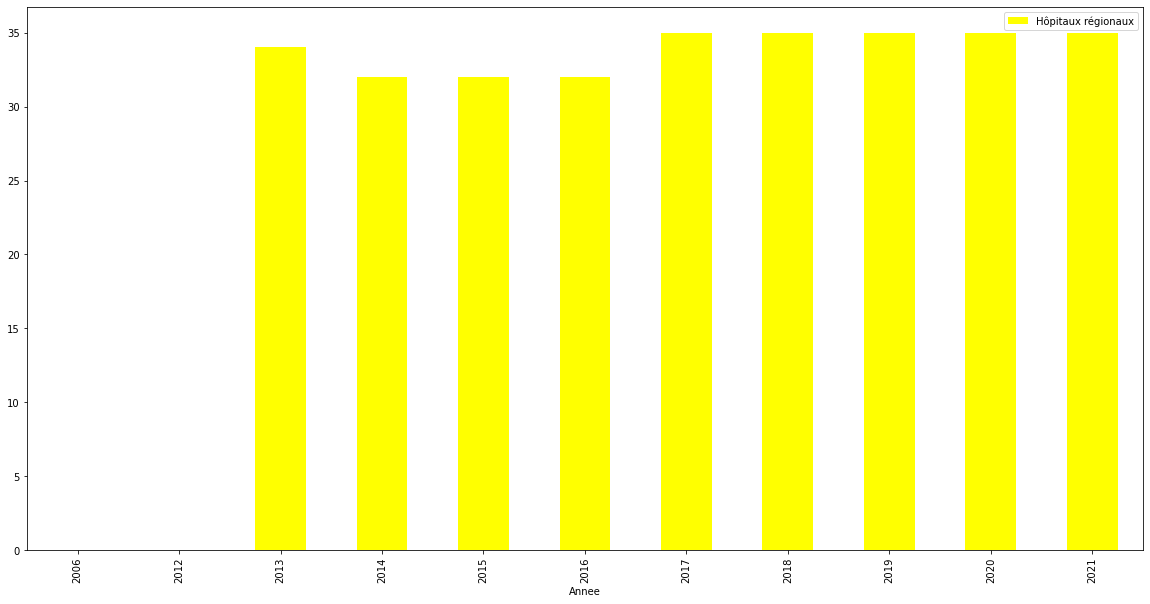

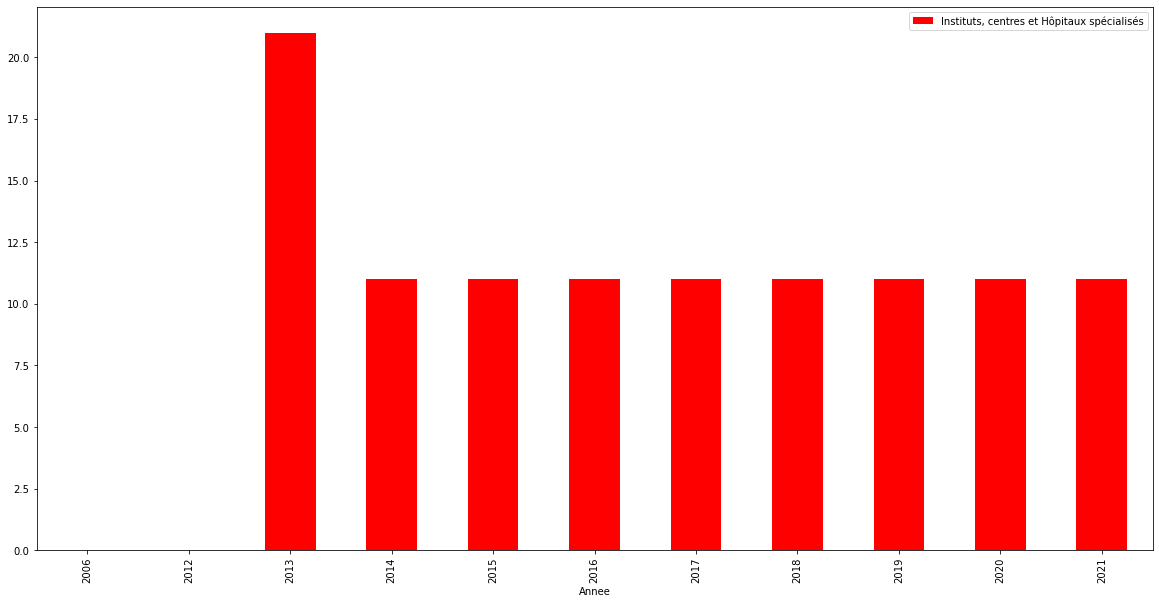

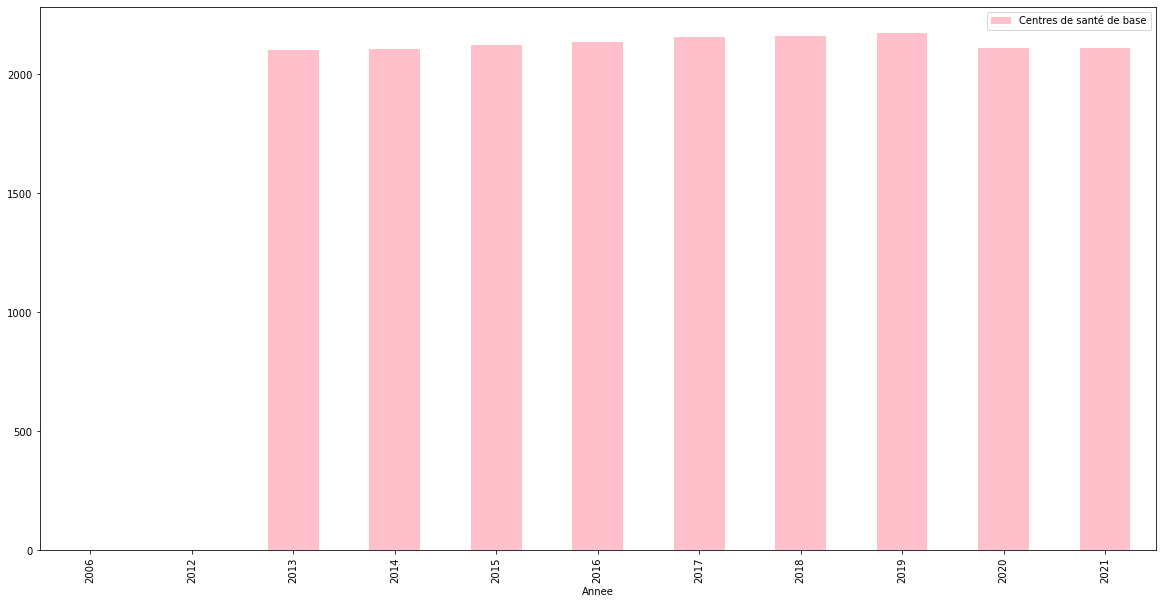

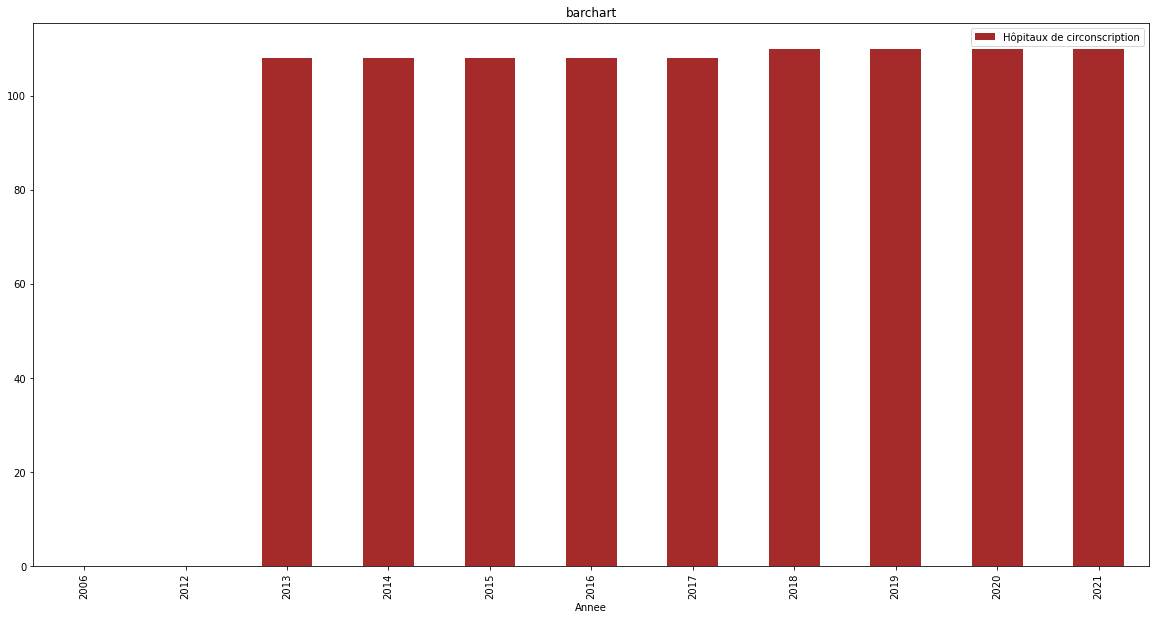

In [218]:
# bar plot
d1=df1.plot(kind = 'bar',
        x = 'Annee',
        y = 'Hôpitaux généraux',
        color = 'green')

d2=df1.plot(kind = 'bar',
        x='Annee',
        y= 'Hôpitaux régionaux',
        color = 'yellow')

d3=df1.plot(kind = 'bar',
        x='Annee',
        y= 'Instituts, centres et Hôpitaux spécialisés',
        color = 'red')

d4=df1.plot(kind = 'bar',
        x='Annee',
        y= 'Centres de santé de base',
        color = 'pink')

d5=df1.plot(kind = 'bar',
        x='Annee',
        y= 'Hôpitaux de circonscription',
        color = 'brown')
  
# set the title
plt.title('barchart')
  
# show the plot
plt.show()

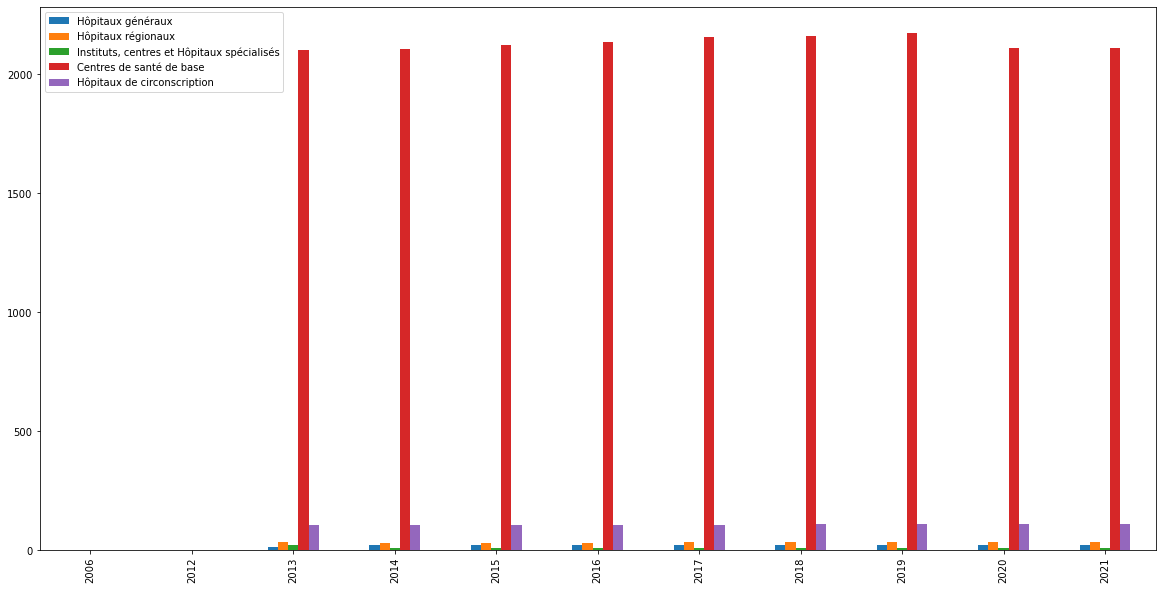

In [87]:
inf=df1["Hôpitaux généraux"].tolist()
inf1=df1["Hôpitaux régionaux"].tolist()
inf2=df1["Instituts, centres et Hôpitaux spécialisés"].tolist()
inf3=df1["Centres de santé de base"].tolist()
inf4=df1['Hôpitaux de circonscription'].tolist()
inf5=df1['Annee'].tolist()
f5=pd.DataFrame({'Hôpitaux généraux': inf,'Hôpitaux régionaux': inf1,'Instituts, centres et Hôpitaux spécialisés':inf2,'Centres de santé de base':inf3,'Hôpitaux de circonscription':inf4}, index=inf5)
plt.rcParams["figure.figsize"] = (20,10)
ax1 = f5.plot.bar()


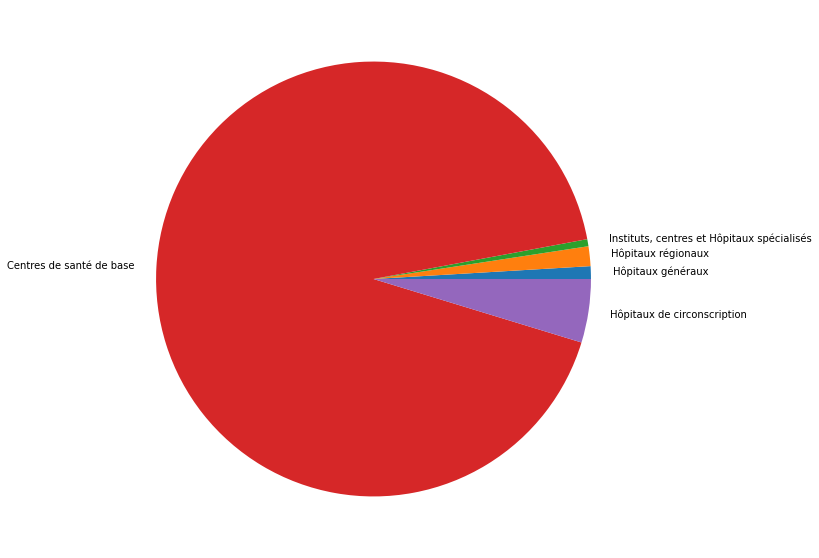

In [215]:
# pie infras publique
d1=df1["Hôpitaux généraux"].mean()
d2=df1["Hôpitaux régionaux"].mean()
d3=df1["Instituts, centres et Hôpitaux spécialisés"].mean()
d4=df1["Centres de santé de base"].mean()
d5=df1['Hôpitaux de circonscription'].mean()
y=np.array([d1,d2,d3,d4,d5])
mylabels = ["Hôpitaux généraux", "Hôpitaux régionaux", "Instituts, centres et Hôpitaux spécialisés", "Centres de santé de base","Hôpitaux de circonscription"]
plt.pie(y,labels = mylabels)
plt.show()

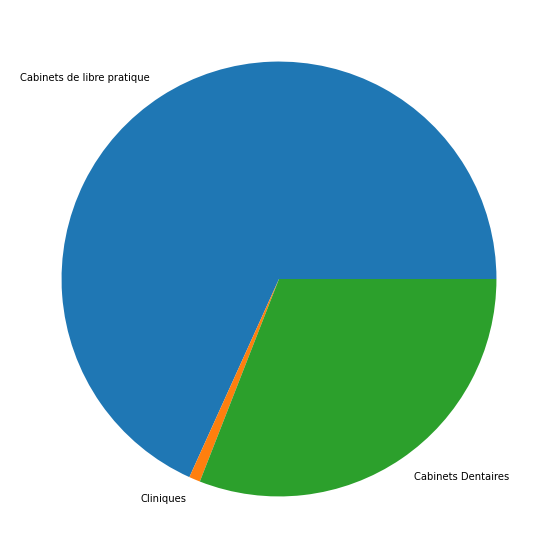

In [217]:
# pie infras privée
dp1=df1["Cabinets de libre pratique"].mean()
dp2=df1["Cliniques"].mean()
dp3=df1["Cabinets Dentaires"].mean()
y=np.array([dp1,dp2,dp3])
mylabels = ["Cabinets de libre pratique","Cliniques","Cabinets Dentaires"]
plt.pie(y,labels = mylabels)
plt.show() 

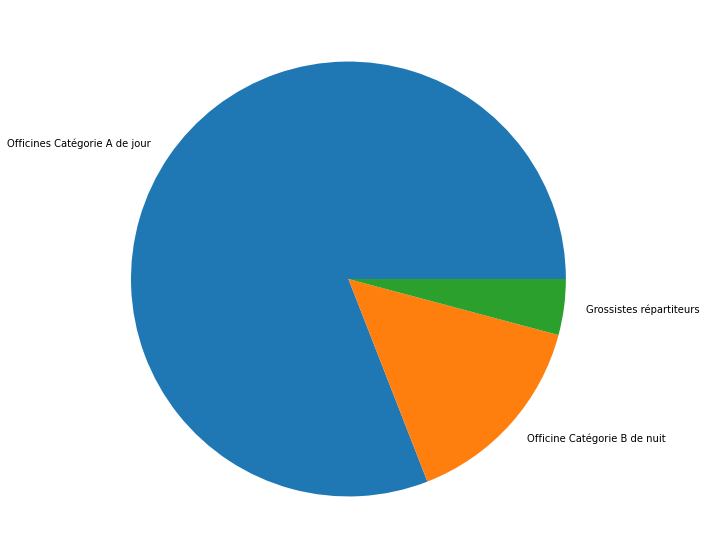

In [218]:
# pie infra pharmacies
phar1=df1["Officines Catégorie A de jour )"].mean()
phar2=df1["Officine Catégorie B de nuit"].mean()
phar3=df1["Grossistes répartiteurs"].mean()
y=np.array([phar1,phar2,phar3])
mylabels = ["Officines Catégorie A de jour","Officine Catégorie B de nuit","Grossistes répartiteurs"]
plt.pie(y,labels = mylabels)
plt.show() 

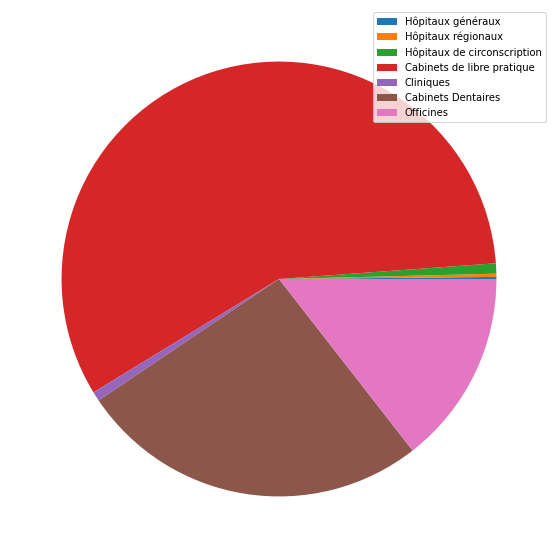

In [220]:
# pie infras totale 
d1=df1["Hôpitaux généraux"].mean()
d2=df1["Hôpitaux régionaux"].mean()
d5=df1['Hôpitaux de circonscription'].mean()
dp1=df1["Cabinets de libre pratique"].mean()
dp2=df1["Cliniques"].mean()
dp3=df1["Cabinets Dentaires"].mean()
phar5=df1["Officines"].mean()

y=np.array([d1,d2,d5,dp1,dp2,dp3,phar5])
mylabels = ["Hôpitaux généraux", "Hôpitaux régionaux","Hôpitaux de circonscription","Cabinets de libre pratique","Cliniques","Cabinets Dentaires","Officines"]
# fig = plt.figure(1, figsize=(6,6))

plt.pie(y,textprops={'fontsize': 30})
plt.legend(mylabels)
plt.show()

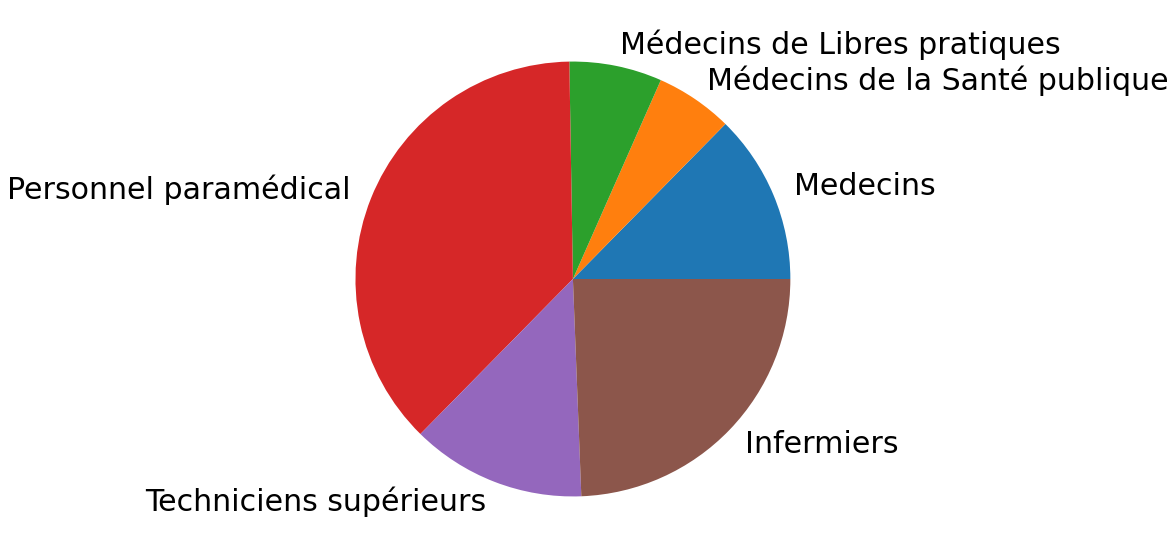

In [221]:
# personnel medical
p1=df1["Medecins"].mean()
p2=df1["Médecins de la Santé publique"].mean()
p3=df1['Médecins de Libres pratiques'].mean()
p4=df1["Personnel paramédical"].mean()
p5=df1["Techniciens supérieurs"].mean()
p6=df1["Infermiers"].mean()

y=np.array([p1,p2,p3,p4,p5,p6,])
mylabels = ["Medecins", "Médecins de la Santé publique","Médecins de Libres pratiques","Personnel paramédical","Techniciens supérieurs","Infermiers"]

plt.pie(y,labels=mylabels,textprops={'fontsize': 30})
plt.show()

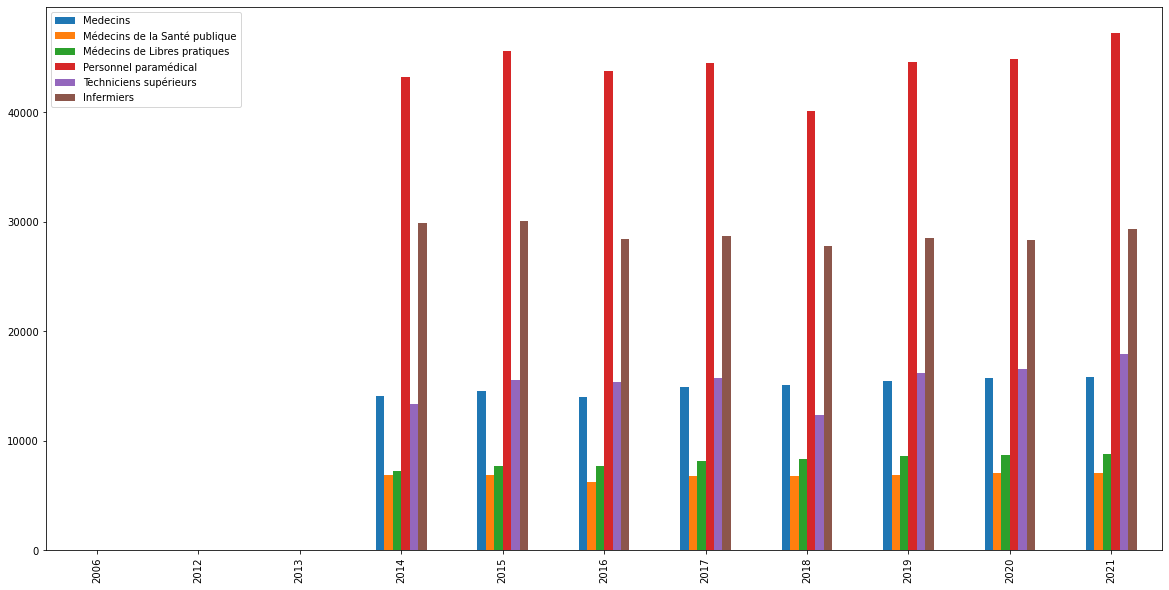

In [88]:
per1=df1["Medecins"].tolist()
per2=df1["Médecins de la Santé publique"].tolist()
per3=df1['Médecins de Libres pratiques'].tolist()
per4=df1["Personnel paramédical"].tolist()
per5=df1["Techniciens supérieurs"].tolist()
per6=df1["Infermiers"].tolist()
annee=df1['Annee'].tolist()
f8=pd.DataFrame({'Medecins': per1,'Médecins de la Santé publique': per2,'Médecins de Libres pratiques':per3,'Personnel paramédical':per4,'Techniciens supérieurs':per5,'Infermiers':per6}, index=annee)
plt.rcParams["figure.figsize"] = (20,10)
ax = f8.plot.bar()

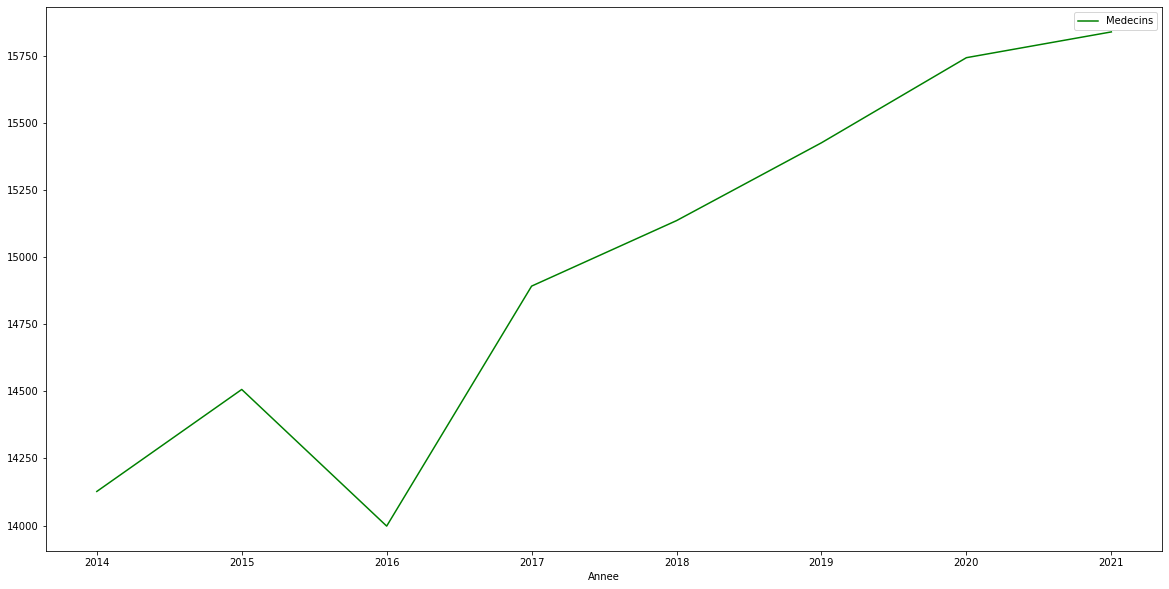

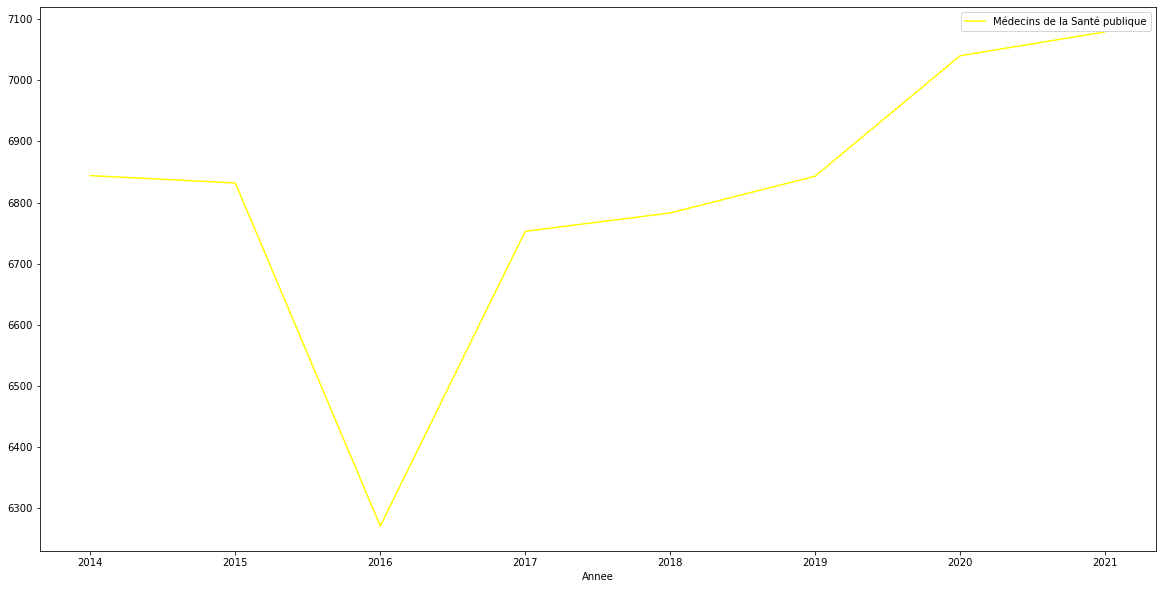

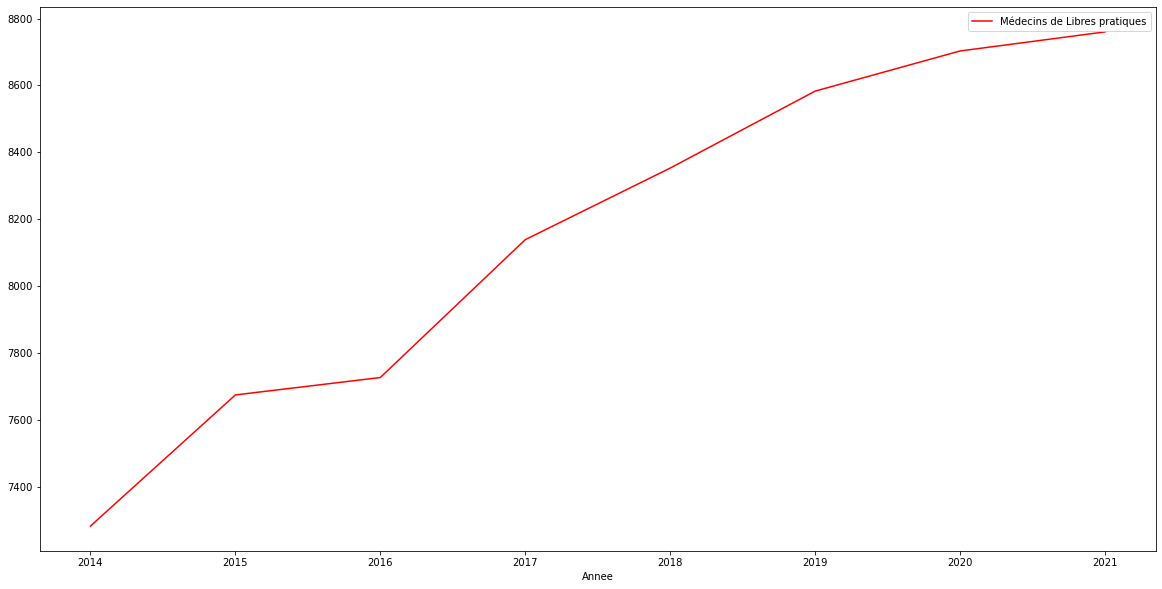

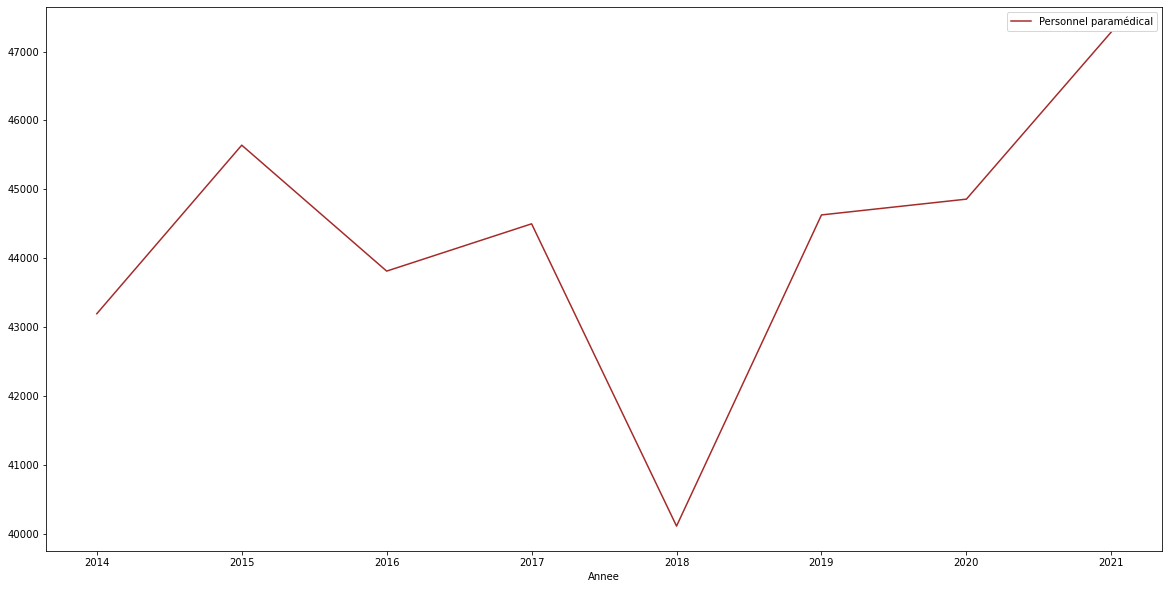

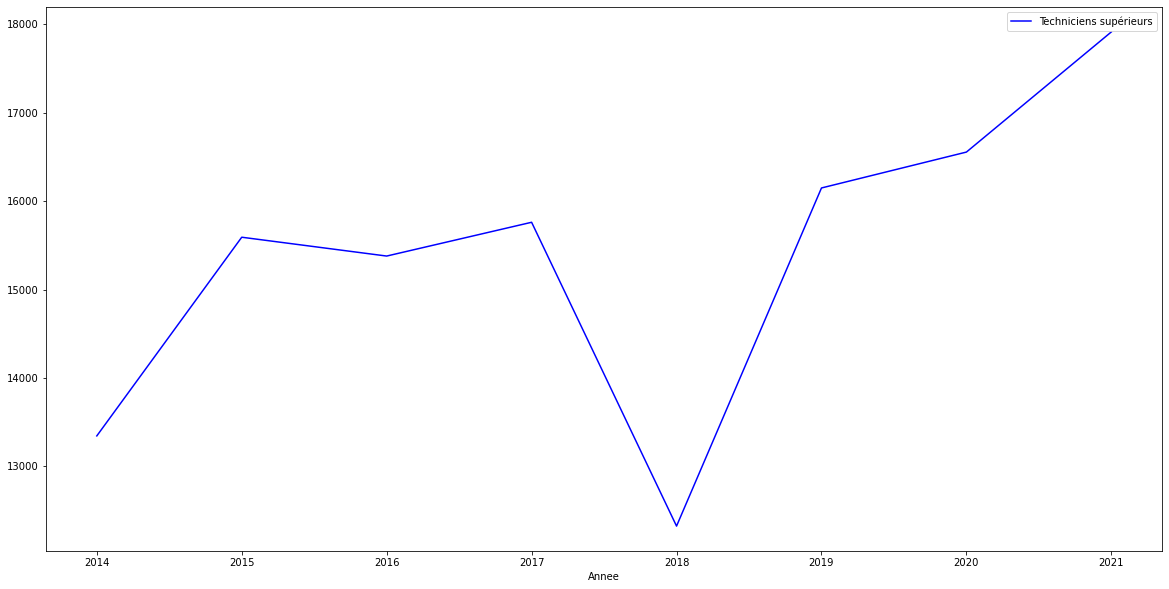

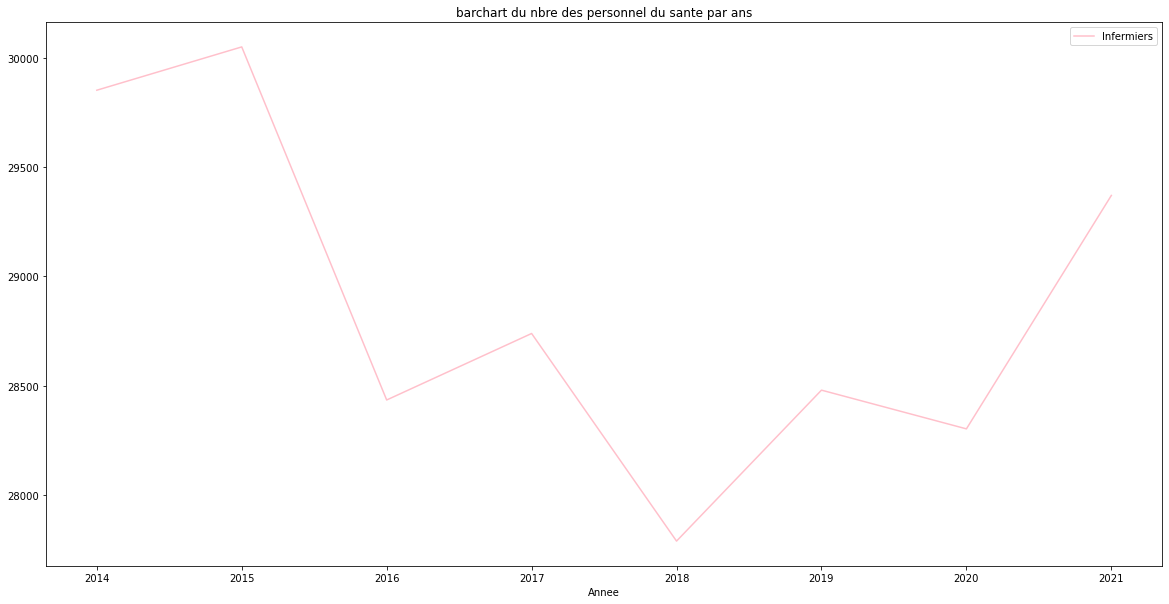

In [75]:
# On remarque que Depuis 2017,il y'a un decline par rapport au nbre du personnel
# de santé en tunisie. cela du que 
# les médecins ont quitté la Tunisie chaque année, 
# principalement de jeunes médecins, contre une moyenne de 800 
# médecins diplômés chaque année . 
# Ces médecins quittent la Tunisie, après avoir obtenu leur diplôme 
# de doctorat en médecine, pour rejoindre d'autres destinations préférentielles
d1=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Medecins',
        color = 'green')

d2=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Médecins de la Santé publique',
        color = 'yellow')

d3=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Médecins de Libres pratiques',
        color = 'red')

d4=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Personnel paramédical',
        color = 'brown')

d5=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Techniciens supérieurs',
        color = 'blue')

d6=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Infermiers',
        color = 'pink')

# set the title
plt.title('barchart du nbre des personnel du sante par ans')
  
# show the plot
plt.show()

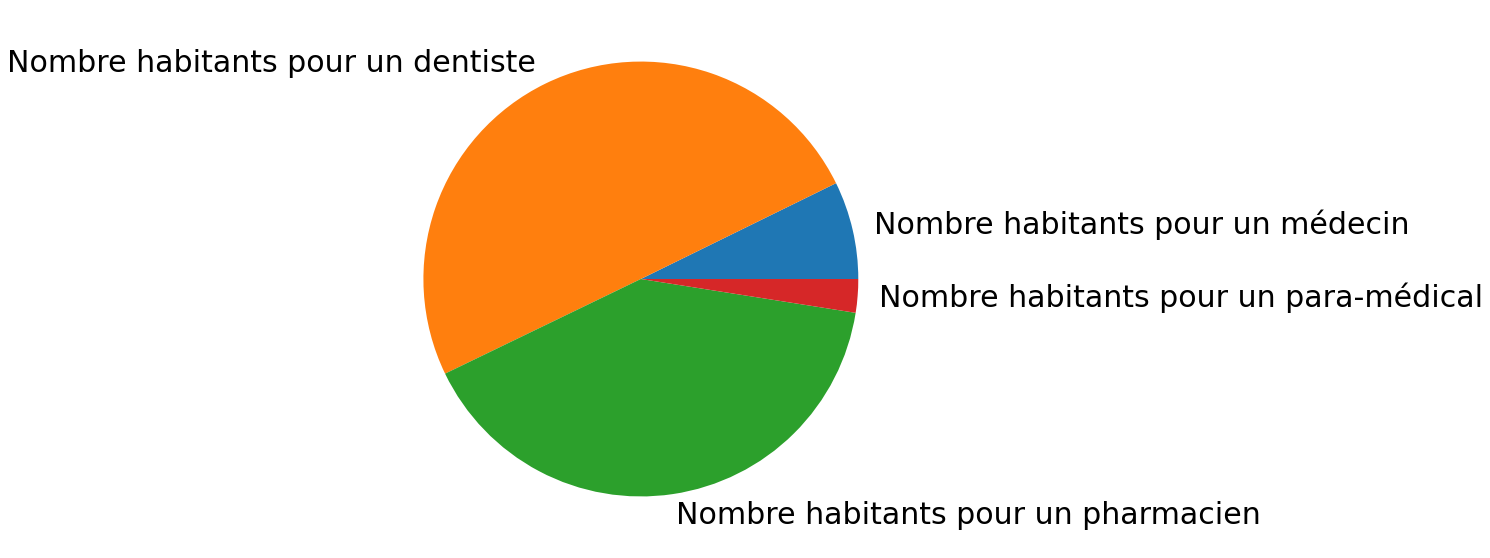

In [79]:
# Répartition de la population par personnel medical
rep1=df1["Nombre habitants pour un médecin"].mean()
rep2=df1["Nombre habitants pour un dentiste"].mean()
rep3=df1["Nombre habitants pour un pharmacien"].mean()
rep4=df1["Nombre habitants pour un para-médical"].mean()

y=np.array([rep1,rep2,rep3,rep4])
mylabels = ["Nombre habitants pour un médecin", "Nombre habitants pour un dentiste","Nombre habitants pour un pharmacien","Nombre habitants pour un para-médical"]

plt.pie(y,labels=mylabels,textprops={'fontsize': 30})
plt.show()

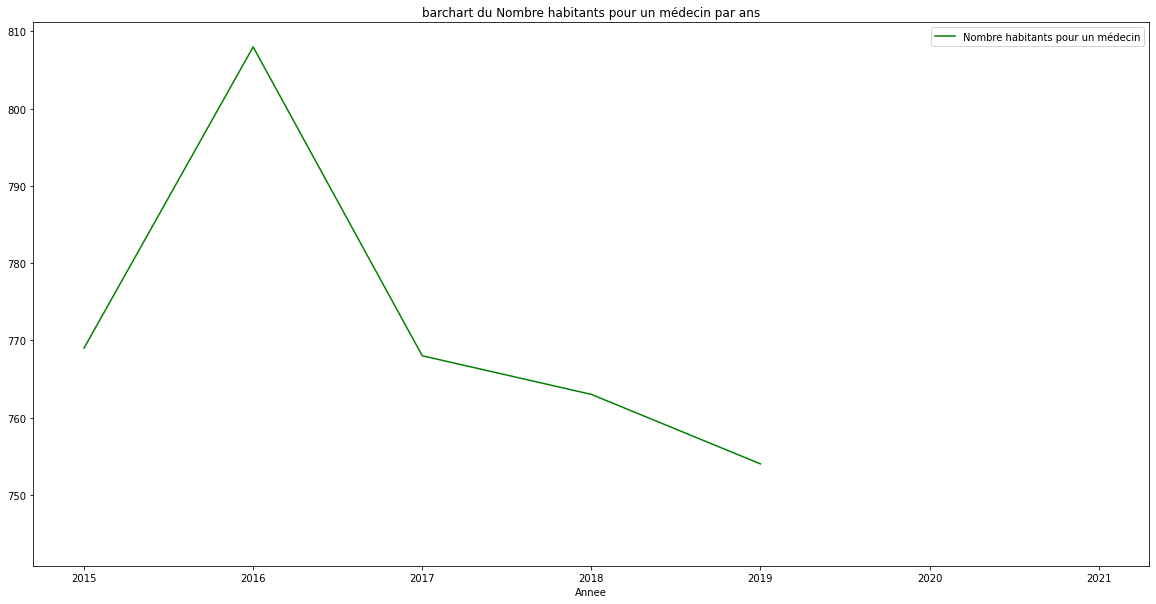

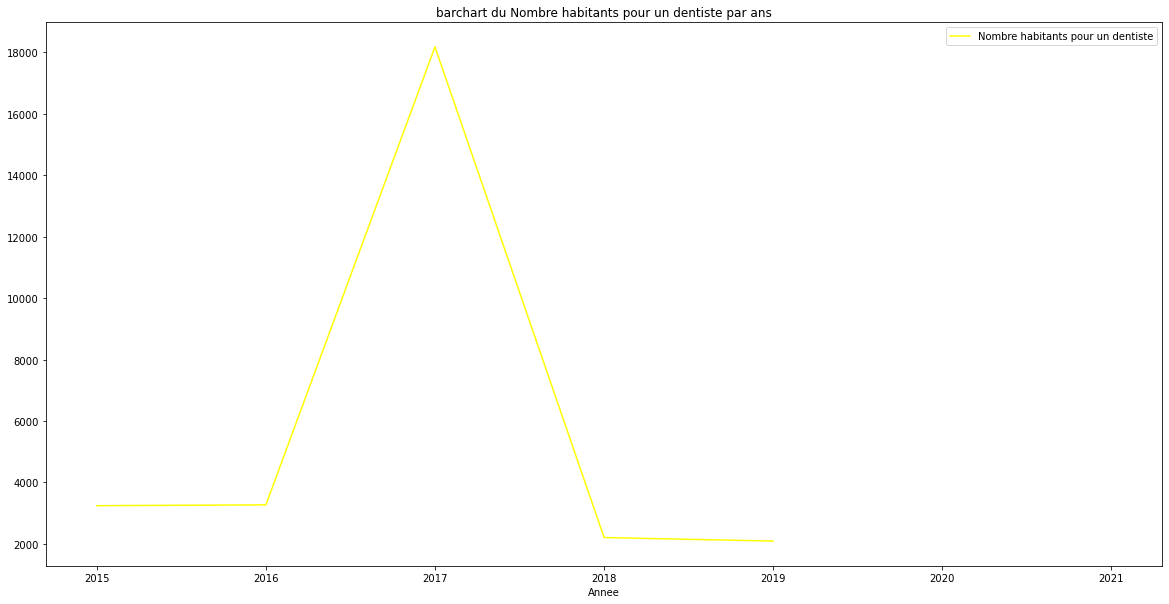

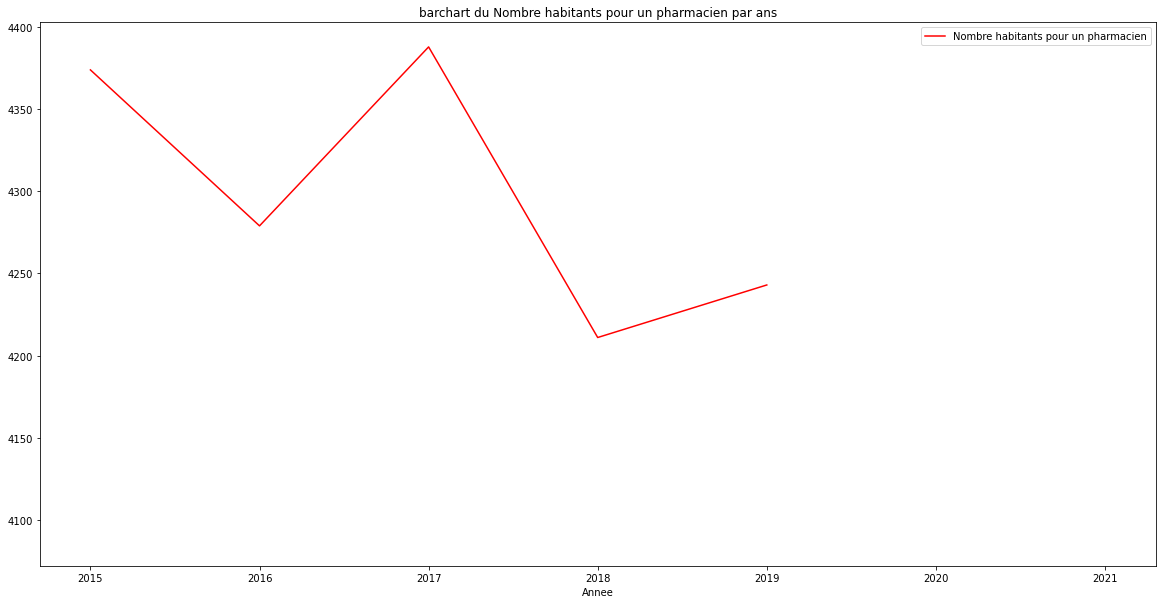

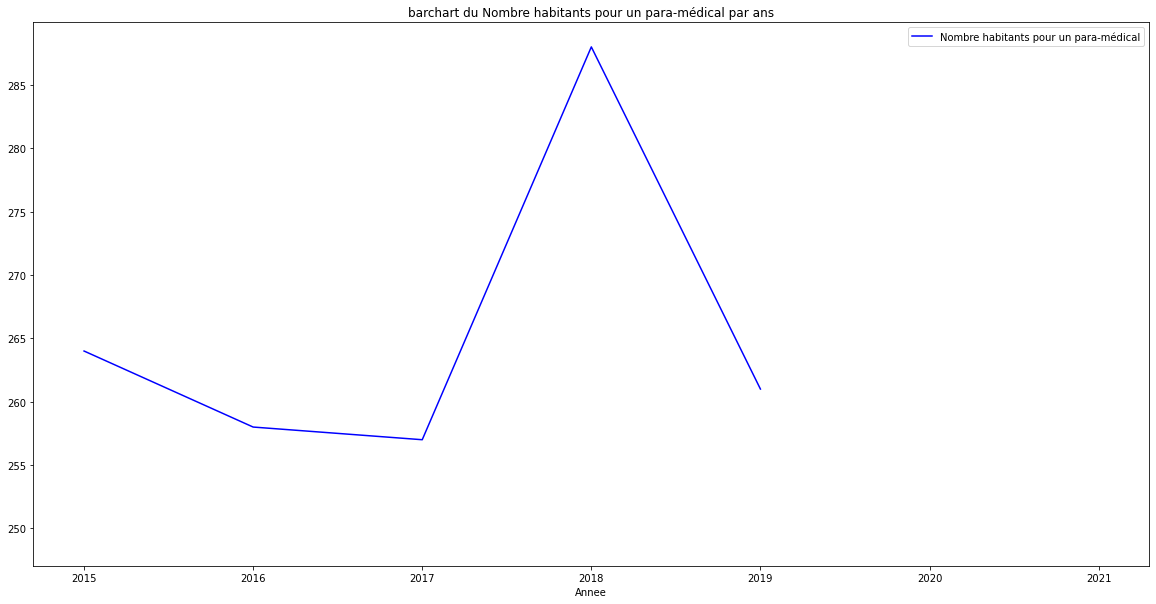

In [81]:
repar1=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Nombre habitants pour un médecin',
        color = 'green')
# set the title
plt.title('barchart du Nombre habitants pour un médecin par ans')

repar2=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Nombre habitants pour un dentiste',
        color = 'yellow')
# set the title
plt.title('barchart du Nombre habitants pour un dentiste par ans')

repar3=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Nombre habitants pour un pharmacien',
        color = 'red')
# set the title
plt.title('barchart du Nombre habitants pour un pharmacien par ans')

repar4=df1.plot(kind = 'line',
        x = 'Annee',
        y = 'Nombre habitants pour un para-médical',
        color = 'blue')

# set the title
plt.title('barchart du Nombre habitants pour un para-médical par ans')
  
# show the plot
plt.show()

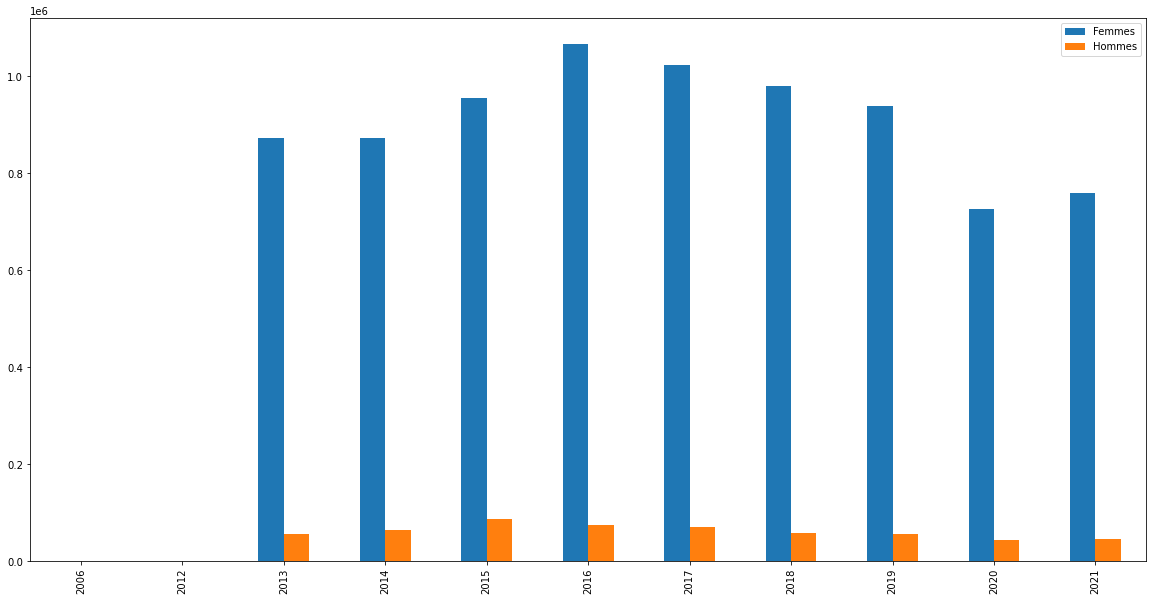

In [98]:
# beneficiares du plannig familial par ans 
per1=df1["Femmes"].tolist()
per2=df1["Hommes"].tolist()
annee=df1['Annee'].tolist()
f9=pd.DataFrame({'Femmes': per1,'Hommes': per2},index=annee)
plt.rcParams["figure.figsize"] = (20,10)
ax = f9.plot.bar()

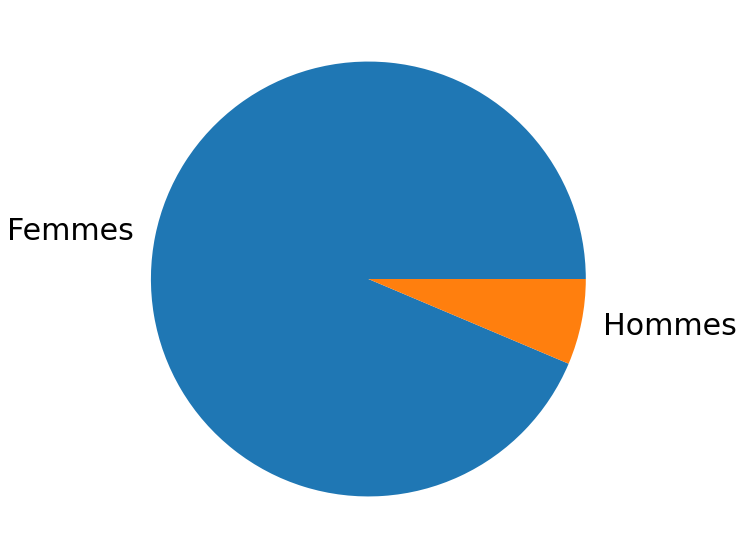

In [155]:
# beneficiares du plannig familial par genre 
benef1=df1["Bénéficiaires par sexe"].mean()
benef2=df1["Femmes"].mean()
benef3=df1["Hommes"].mean()


y=np.array([benef2,benef3])
mylabels = ["Femmes", "Hommes"]

plt.pie(y,labels=mylabels,textprops={'fontsize': 30})
plt.show()

In [141]:
gr = df1.groupby("Annee")

In [160]:
gr1=gr['Medecins'].sum()
print(gr1,'\n')
print("****************le nombre maxi de medecin*********",gr1.max())

gr2=gr['Médecins de la Santé publique'].sum()
print(gr2,'\n')
print("*******le nombre maxi de Médecins de la Santé publique*****",gr2.max())

gr3=gr['Médecins de Libres pratiques'].sum()
print(gr3,'\n')
print("*******le nombre maxi de Médecins de Libres pratiques*****",gr3.max())

gr4=gr['Personnel paramédical'].sum()
print(gr4,'\n')
print("*******le nombre maxi de Personnel paramédical*****",gr4.max())

gr5=gr['Techniciens supérieurs'].sum()
print(gr5,'\n')
print("*******le nombre maxi de Techniciens supérieurs*****",gr5.max())

gr6=gr['Infermiers'].sum()
print(gr6,'\n')
print("*******le nombre maxi de Infermiers*****",gr6.max())



Annee
2006        0.0
2012        0.0
2013        0.0
2014    14127.0
2015    14507.0
2016    13998.0
2017    14892.0
2018    15136.0
2019    15426.0
2020    15743.0
2021    15839.0
Name: Medecins, dtype: float64 

****************le nombre maxi de medecin********* 15839.0
Annee
2006       0.0
2012       0.0
2013       0.0
2014    6844.0
2015    6832.0
2016    6271.0
2017    6753.0
2018    6783.0
2019    6843.0
2020    7040.0
2021    7079.0
Name: Médecins de la Santé publique, dtype: float64 

*******le nombre maxi de Médecins de la Santé publique***** 7079.0
Annee
2006       0.0
2012       0.0
2013       0.0
2014    7283.0
2015    7675.0
2016    7727.0
2017    8139.0
2018    8353.0
2019    8583.0
2020    8703.0
2021    8760.0
Name: Médecins de Libres pratiques, dtype: float64 

*******le nombre maxi de Médecins de Libres pratiques***** 8760.0
Annee
2006        0.0
2012        0.0
2013        0.0
2014    43197.0
2015    45642.0
2016    43815.0
2017    44501.0
2018    40116.0
2019    44

In [200]:
#  on affiche l'annee, ou la femme est la plus beneficiare 
# de la plannification du plannig familial
femme=df1['Femmes']
# femme
femme2=df1['Femmes'].max()
# femme2
df_femme=df1[['Annee','Bénéficiaires par sexe']][femme==femme2]
df_femme

,Annee,Bénéficiaires par sexe
5,2016,1141437.0


In [201]:
#  on affiche l'annee, ou l'homme est le plus beneficiare 
# de la plannification du plannig familial
homme=df1['Hommes']
# homme
homme2=df1['Hommes'].max()
# homme2
df_homme=df1[['Annee','Bénéficiaires par sexe']][homme==homme2]
df_homme

,Annee,Bénéficiaires par sexe
4,2015,1041140.0


In [209]:
#  on affiche l'annee, ou le service de santé de la reprodution est en propagation
acte=df1['Actes Santé de la Reproduction']
# acte
acte2=df1['Actes Santé de la Reproduction'].max()
# act2
df_acte=df1[['Annee','Actes Santé de la Reproduction']][acte==acte2]
df_acte

,Annee,Actes Santé de la Reproduction
5,2016,866118.0


In [205]:
#  on affiche l'annee, ou le service de santé de la reprodution est en propagation
actepost=df1['Actes Postnatal']
# acte
actepost1=df1['Actes Postnatal'].max()
# act2
df_actepost=df1[['Annee','Actes Postnatal']][actepost==actepost1]
df_actepost

,Annee,Actes Postnatal
3,2014,105905.0


In [206]:
#  on affiche l'annee, ou le service de santé de la reprodution est en propagation
acteprena=df1['Actes Prénatal']
# acte
acteprena1=df1['Actes Prénatal'].max()
# act2
df_acteprena=df1[['Annee','Actes Prénatal']][acteprena==acteprena1]
df_acteprena

,Annee,Actes Prénatal
2,2013,606186.0


In [241]:
#  on affiche l'annee, ou le personnel medical est en propagation
perso=df1['Médecins de la Santé publique']
perso2=df1['Médecins de Libres pratiques']
# acte
perso1=df1['Médecins de la Santé publique'].max()
perso3=df1['Médecins de Libres pratiques'].max()
# act2
df_perso=df1[['Annee','Médecins de la Santé publique']][perso==perso1]

dfperso1=df1[['Annee','Médecins de Libres pratiques']][perso2==perso3]
df_t=[dfperso1,df_perso]
df_t


[    Annee  Médecins de Libres pratiques
 10   2021                        8760.0,
     Annee  Médecins de la Santé publique
 10   2021                         7079.0]